In [32]:
from osgeo import gdal

In [33]:
#nmtif = gdal.Open(r'C:\Users\moonb\Desktop\repos\Mastering-Geospatial-Analysis-with-Python\Chapter06\Chapter10.tif') 
nmtif = gdal.Open(r'C:\Users\moonb\Desktop\repos\Mastering-Geospatial-Analysis-with-Python\Chapter06\3320D_2010_315_RGB_LATLNG.tif') 


print(nmtif.GetMetadata())
print(nmtif.GetProjection())

{'AREA_OR_POINT': 'Area'}
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


# There is problem with below because my tif has projection.
from osgeo import osr 
p=osr.SpatialReference() 
p.ImportFromEPSG(2964)
print(p.ExportToWkt())
nmtif.SetProjection(p.ExportToWkt()) 
print(nmtif.GetProjection())

In [34]:
geoTiffDriver="GTiff" 
driver=gdal.GetDriverByName(geoTiffDriver) 
out=driver.CreateCopy("copy.tif",nmtif,strict=0) 
out.GetProjection()


'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

In [35]:
nmtif.RasterCount

4

In [36]:
band=nmtif.GetRasterBand(1)
values=band.ReadAsArray()
print(values[1,1])

80


In [37]:
one= nmtif.GetRasterBand(1).ReadAsArray() 
two = nmtif.GetRasterBand(2).ReadAsArray() 
three= nmtif.GetRasterBand(3).ReadAsArray() 
print(str(one[100,100])+","+ str(two[100,100])+","+str(three[100,100]))


72,88,104


In [38]:
one=nmtif.GetRasterBand(1) 
two=nmtif.GetRasterBand(2) 
three=nmtif.GetRasterBand(3) 
# print mean and std deviation
print(one.ComputeBandStats()) 
print(two.ComputeBandStats())
print(three.ComputeBandStats())

(79.8867490508512, 12.172131734091082)
(92.86872887571549, 13.572711423066895)
(102.4072245368095, 11.365957794978494)


In [39]:
print(str(one.GetMinimum())+","+str(one.GetMaximum())) 

None,None


In [40]:
print(two.GetDescription())   # returns 'band_2' 
two.SetDescription("The Green Band")
print(two.GetDescription())  # returns "The Green Band" 


The Green Band


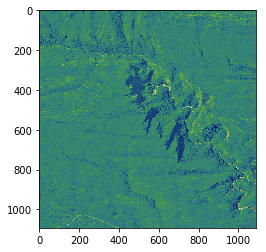

In [45]:
import numpy as np 
from matplotlib.pyplot import imshow 
%matplotlib inline
data_array=nmtif.ReadAsArray() 
x=np.array(data_array[0]) # x.shape ---> 6652,6300 
w, h =6652, 6300 
image = x.reshape(x.shape[0],x.shape[1]) 
imshow(image, cmap='gist_earth')

### Code to Create Raster Image

In [66]:
a_raster=np.array([ [10,10,1,10,10,10,10], [1,1,1,50,10,10,50], [10,1,1,51,10,10,50], [1,1,1,1,50,10,50]]) 
coord=(-106.629773,35.105389) 
w=10
h=10 
name="BigI.tif"

In [70]:
d=gdal.GetDriverByName("GTiff") 
output=d.Create(name,a_raster.shape[1],a_raster.shape[0],1,gdal.GDT_UInt16) 
output.SetGeoTransform((coord[0],w,0,coord[1],0,h)) 
output.GetRasterBand(1).WriteArray(a_raster) 
outsr=osr.SpatialReference() 
outsr.ImportFromEPSG(4326) 
output.SetProjection(outsr.ExportToWkt()) 
output.FlushCache()
#output = None


In [71]:
a_raster.shape

(4, 7)

In [74]:
output.GetProjection()

''

array([[10, 10,  1, 10, 10, 10, 10],
       [ 1,  1,  1, 50, 10, 10, 50],
       [10,  1,  1, 51, 10, 10, 50],
       [ 1,  1,  1,  1, 50, 10, 50]], dtype=uint16)

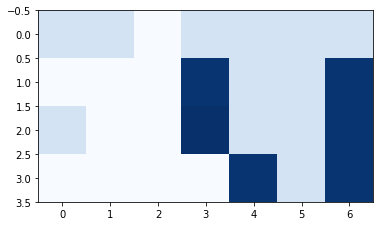

In [73]:
data=output.ReadAsArray() 
w, h =4, 7 
image = data.reshape(w,h) #assuming X[0] is of shape (400,) .T 
imshow(image, cmap='Blues') #enter bad color to get list 
data 
